In [131]:
import spotipy
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

from colour import Color
from spotipy.oauth2 import SpotifyOAuth

In [132]:
scope = 'user-top-read'
ranges = ['short_term', 'medium_term', 'long_term']

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))


sml = []
pop = [[],[],[]]
artist = [[],[],[]]
terms = ['short_term', 'medium_term', 'long_term']
pop_score = 0

for i in range(3):

    results = sp.current_user_top_artists(time_range=terms[i], limit=50)

    for j, item in enumerate(results['items']):
        popularity = item['popularity']
        pop_score += popularity
        artist[i].append(item['name'])
        pop[i].append(popularity)
    sml.append(popularity)
print(sml)

[87, 83, 74]


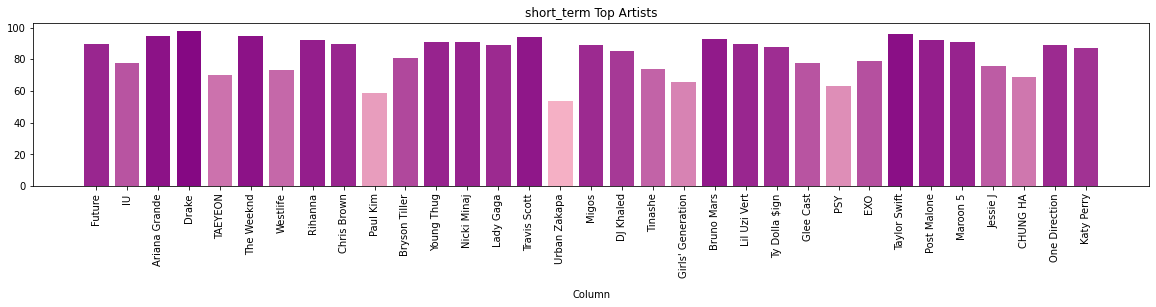

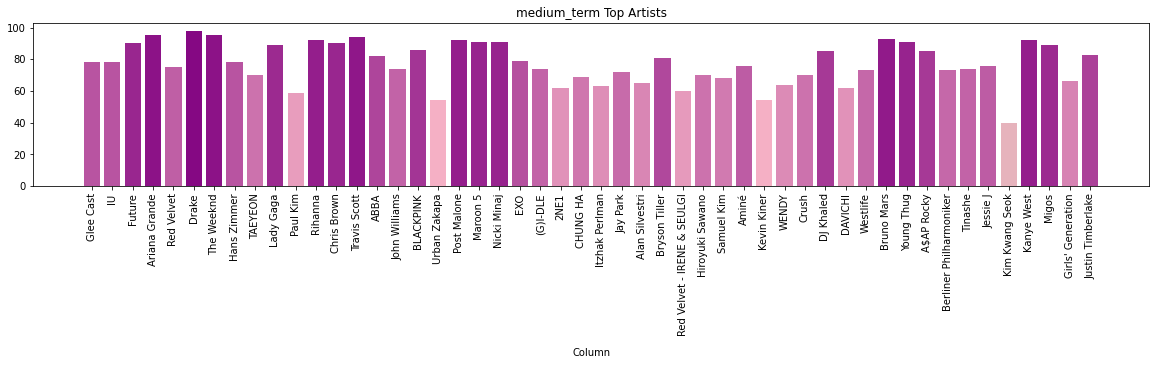

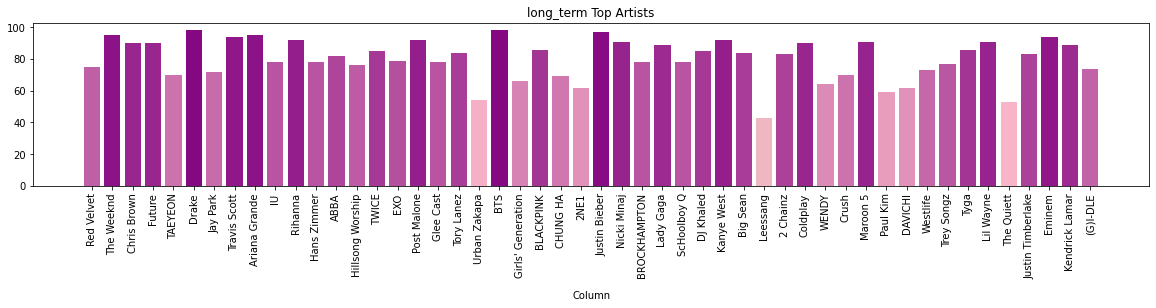

In [133]:
for i in range(3):
    df = pd.DataFrame({"x" : pop[i]})

    cmap = mcolors.LinearSegmentedColormap.from_list("", ["grey", "pink", "purple"])
    
    
    plt.bar(artist[i], df["x"], color=cmap(df.x.values/100))
    plt.xlabel('Column', labelpad=12)
    plt.xticks(rotation=90)
    plt.title(terms[i] + " Top Artists")
    plt.show()

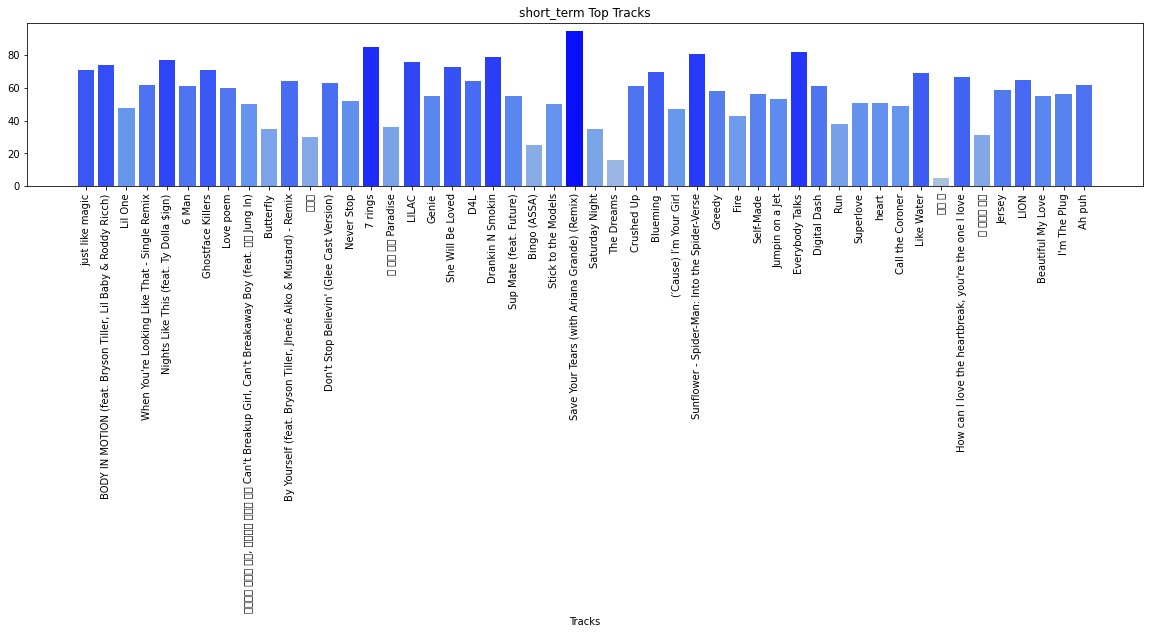

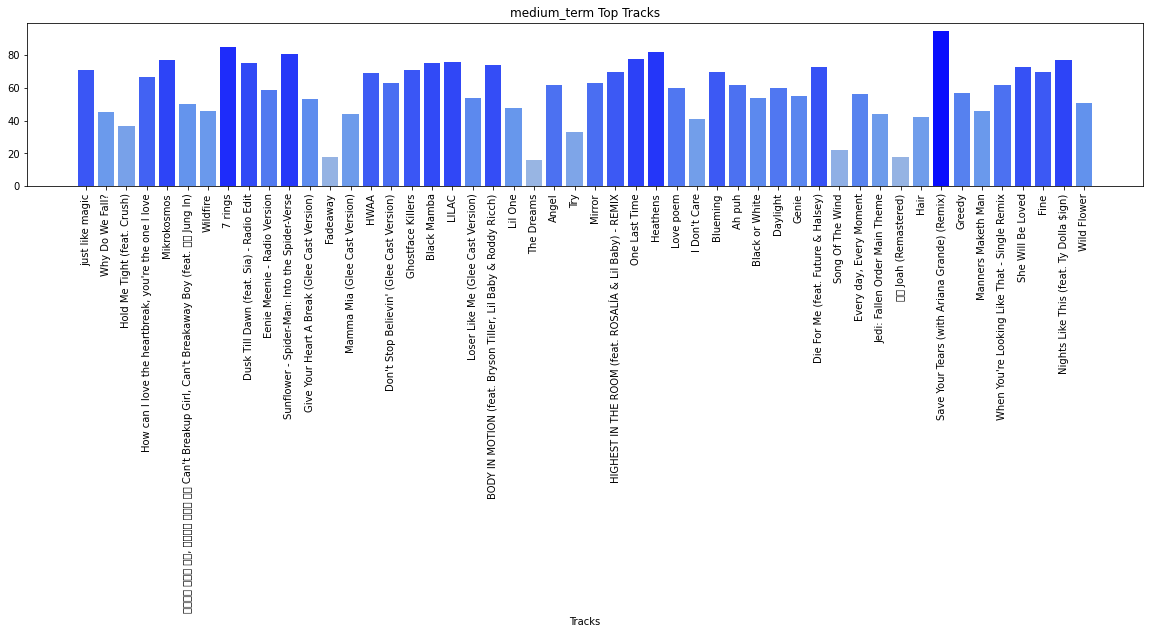

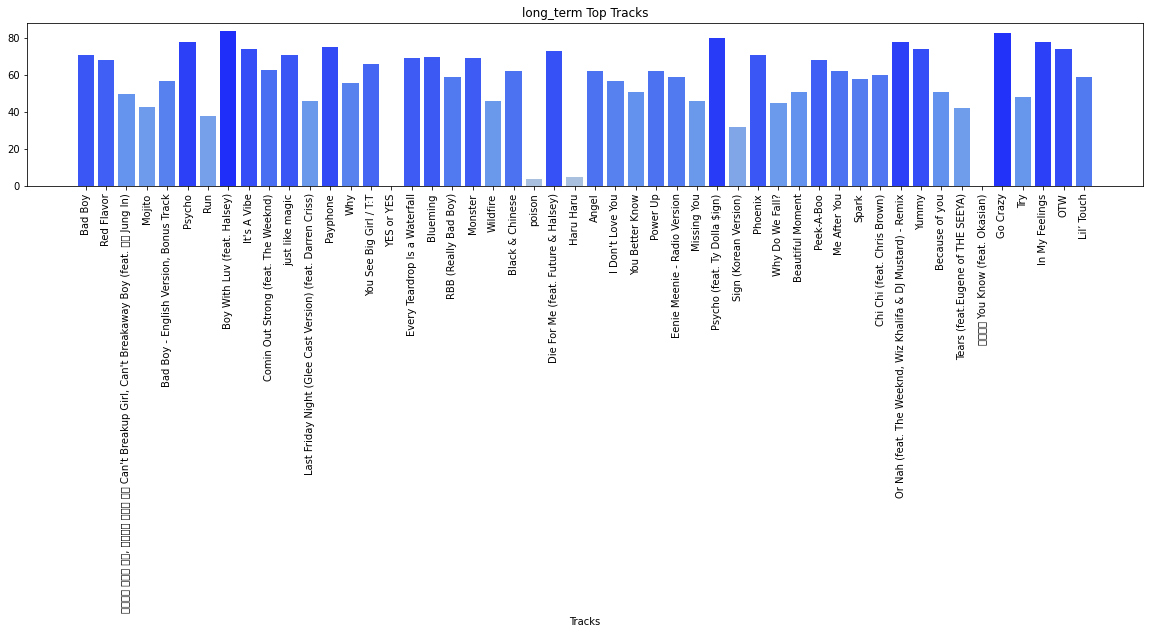

In [134]:
for i in range(3):
    results = sp.current_user_top_tracks(limit=50,offset=0,time_range=terms[i])

    tracks = [[],[],[]]
    track_pop = [[],[],[]]
    text = ""
    
    for j, item in enumerate(results['items']):
        popularity = item['popularity']
        track = item['name']
        track_pop[i].append(popularity)
        tracks[i].append(track)

    df1 = pd.DataFrame({"x" : track_pop[i]})

    cmap = mcolors.LinearSegmentedColormap.from_list("", ["lightsteelblue", "cornflowerblue", "blue"])

    plt.bar(tracks[i], df1["x"], color=cmap(df1.x.values/100))
    plt.xlabel('Tracks', fontsize=10)
    plt.xticks(rotation=90)
    plt.title(terms[i] + " Top Tracks")
    plt.show()

In [11]:
from wordcloud import WordCloud

In [30]:
text = ""

for i in range(3):
    results = sp.current_user_top_tracks(limit=100,offset=0,time_range=terms[i])
    for j, item in enumerate(results['items']):
        text += item['artists'][0]['name'] + " "

In [32]:
ct = (text)

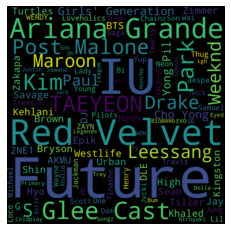

In [35]:
wordcloud = WordCloud(width=700, height=700).generate(text)
 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()